In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

units = "imperial"
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"There were {len(cities)} cities queried.")

There were 607 cities queried.


In [3]:
weather_df = pd.DataFrame({
    "City Name":[],
    "Country":[],
    "Latitude":[],
    "Longitude":[],
    "Date":[],
    "Temperature":[], 
    "Humidity":[],
    "Wind Speed":[],
    "Clouds":[]
})

print("""
                             Beginning Data Retrieval
--------------------------------------------------------------------------------
""")
count = 1

for i in range(len(cities)):
    try:
        query_url = f"{base_url}appid={api_keys.api_key}&q={cities[i]}&units={units}"
        print(f"Processing Record {count} of Set 1 | {cities[i]}")
        
        response = requests.get(query_url)
        weather_json = response.json()
        
        cty_cloud = weather_json["clouds"]["all"]
        cty_cntry = weather_json["sys"]["country"]
        cty_date = time.strftime('%Y-%m-%d', time.localtime(weather_json["dt"]))
        cty_humid = weather_json["main"]["humidity"]
        cty_lat = weather_json["coord"]["lat"]
        cty_long = weather_json["coord"]["lat"]
        cty_mx_tmp = weather_json["main"]["temp_max"]
        cty_wndspd = weather_json["wind"]["speed"]
        
        weather_df = weather_df.append({
            "City Name":cities[i],
            "Country":cty_cntry,
            "Latitude":cty_lat,
            "Longitude":cty_long,
            "Date":cty_date,
            "Temperature":cty_mx_tmp, 
            "Humidity":cty_humid,
            "Wind Speed":cty_wndspd,
            "Clouds":cty_cloud
        }, ignore_index=True)
        count+=1
    except:
        print("Insufficient data. Skipping..")
print("""
--------------------------------------------------------------------------------
                                Data Retrieval Complete
--------------------------------------------------------------------------------
""")


                             Beginning Data Retrieval
--------------------------------------------------------------------------------

Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | port elizabeth
Processing Record 3 of Set 1 | vanavara
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | kapaa
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | olga
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | bairiki
Insufficient data. Skipping..
Processing Record 10 of Set 1 | kawalu
Processing Record 11 of Set 1 | kruisfontein
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | kresttsy
Processing Record 14 of Set 1 | bambous virieux
Processing Record 15 of Set 1 | ribeira grande
Processing Record 16 of Set 1 | ossora
Processing Record 17 of Set 1 | cape town
Processing Record 18 of Set 1 | hamina
Processing Record 19 of Set 1 | inongo
Processing Reco

Processing Record 165 of Set 1 | sao felix do xingu
Processing Record 166 of Set 1 | rambha
Processing Record 167 of Set 1 | noyabrsk
Processing Record 168 of Set 1 | santarem
Insufficient data. Skipping..
Processing Record 168 of Set 1 | avera
Processing Record 169 of Set 1 | saint anthony
Processing Record 170 of Set 1 | chuy
Processing Record 171 of Set 1 | kwinana
Processing Record 172 of Set 1 | vao
Processing Record 173 of Set 1 | belushya guba
Insufficient data. Skipping..
Processing Record 173 of Set 1 | campos
Processing Record 174 of Set 1 | kinango
Processing Record 175 of Set 1 | simbahan
Processing Record 176 of Set 1 | grand river south east
Insufficient data. Skipping..
Processing Record 176 of Set 1 | norman wells
Processing Record 177 of Set 1 | wexford
Processing Record 178 of Set 1 | krasnogorsk
Processing Record 179 of Set 1 | oussouye
Processing Record 180 of Set 1 | esso
Processing Record 181 of Set 1 | pedernales
Processing Record 182 of Set 1 | belmonte
Processi

Processing Record 324 of Set 1 | vilhena
Processing Record 325 of Set 1 | port lincoln
Processing Record 326 of Set 1 | taoudenni
Processing Record 327 of Set 1 | mudyuga
Insufficient data. Skipping..
Processing Record 327 of Set 1 | ewa beach
Processing Record 328 of Set 1 | porto santo
Insufficient data. Skipping..
Processing Record 328 of Set 1 | nishihara
Processing Record 329 of Set 1 | fairview
Processing Record 330 of Set 1 | orange
Processing Record 331 of Set 1 | puerto carreno
Processing Record 332 of Set 1 | olafsvik
Insufficient data. Skipping..
Processing Record 332 of Set 1 | trincomalee
Processing Record 333 of Set 1 | san ramon de la nueva oran
Processing Record 334 of Set 1 | slave lake
Processing Record 335 of Set 1 | bac lieu
Insufficient data. Skipping..
Processing Record 335 of Set 1 | soyo
Processing Record 336 of Set 1 | kavaratti
Processing Record 337 of Set 1 | half moon bay
Processing Record 338 of Set 1 | khonuu
Insufficient data. Skipping..
Processing Record

Processing Record 482 of Set 1 | litoral del san juan
Insufficient data. Skipping..
Processing Record 482 of Set 1 | tando muhammad khan
Processing Record 483 of Set 1 | nuuk
Processing Record 484 of Set 1 | margate
Processing Record 485 of Set 1 | qaqortoq
Processing Record 486 of Set 1 | senno
Processing Record 487 of Set 1 | praya
Processing Record 488 of Set 1 | sept-iles
Processing Record 489 of Set 1 | morondava
Processing Record 490 of Set 1 | susanville
Processing Record 491 of Set 1 | tigil
Processing Record 492 of Set 1 | bjornevatn
Processing Record 493 of Set 1 | marystown
Processing Record 494 of Set 1 | teguise
Processing Record 495 of Set 1 | sentyabrskiy
Insufficient data. Skipping..
Processing Record 495 of Set 1 | shelburne
Processing Record 496 of Set 1 | amga
Processing Record 497 of Set 1 | mtambile
Processing Record 498 of Set 1 | staryy nadym
Processing Record 499 of Set 1 | ihtiman
Processing Record 500 of Set 1 | bulgan
Processing Record 501 of Set 1 | yuanchen

In [16]:
weather_df.to_csv(output_data_file)
weather_df.head(10)

,City Name,Country,Latitude,Longitude,Date,Temperature,Humidity,Wind Speed,Clouds
0,bluff,AU,-23.58,-23.58,2018-11-26,63.44,52.0,0.13,0.0
1,port elizabeth,US,39.31,39.31,2018-11-26,51.96,97.0,20.27,100.0
2,vanavara,RU,60.35,60.35,2018-11-26,-3.35,74.0,0.69,36.0
3,bredasdorp,ZA,-34.53,-34.53,2018-11-26,61.68,100.0,24.29,92.0
4,puerto ayora,EC,-0.74,-0.74,2018-11-26,73.52,95.0,12.66,20.0
5,kapaa,US,22.08,22.08,2018-11-26,69.78,100.0,5.06,20.0
6,albany,US,42.65,42.65,2018-11-26,39.95,100.0,7.40,92.0
7,olga,US,34.11,34.11,2018-11-26,58.89,34.0,2.93,0.0
8,ushuaia,AR,-54.81,-54.81,2018-11-26,49.31,57.0,17.81,0.0
9,kawalu,ID,-7.38,-7.38,2018-11-26,68.16,100.0,1.70,76.0


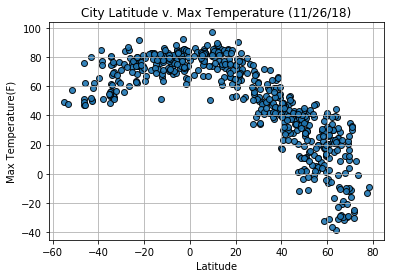

In [17]:
fig, ax = plt.subplots()
lat_v_temp = ax.scatter(
    weather_df["Latitude"],
    weather_df["Temperature"],
    alpha=0.9,
    edgecolor="black",   
)

ax.set_title("City Latitude v. Max Temperature (11/26/18)")
ax.set_ylabel("Max Temperature(F)")
ax.set_xlabel("Latitude")
ax.grid(b=None)

plt.savefig("images")

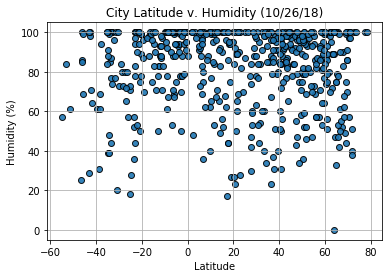

In [18]:
fig, ax = plt.subplots()
lat_v_humid = ax.scatter(
    weather_df["Latitude"],
    weather_df["Humidity"],
    alpha=0.9,
    edgecolor="black",   
)

ax.set_title("City Latitude v. Humidity (10/26/18)")
ax.set_ylabel("Humidity (%)")
ax.set_xlabel("Latitude")
ax.grid(b=None)

plt.savefig("images2")

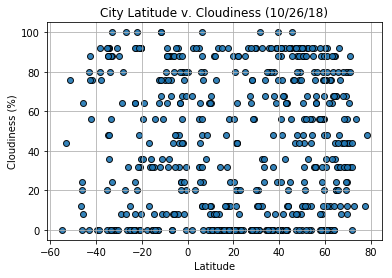

In [19]:
fig, ax = plt.subplots()
lat_v_cloud = ax.scatter(
    weather_df["Latitude"],
    weather_df["Clouds"],
    alpha=0.9,
    edgecolor="black",   
)

ax.set_title("City Latitude v. Cloudiness (10/26/18)")
ax.set_ylabel("Cloudiness (%)")
ax.set_xlabel("Latitude")
ax.grid(b=None)

plt.savefig("images3")